In [1]:
import numpy as np
import pandas as pd

# plotting modules
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = "Arial" # missing fonts:: https://alexanderlabwhoi.github.io/post/2021-03-missingfont/
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 5, 'ytick.major.width': 1.5, 'ytick.major.size': 4})
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
def save_pdf(save_file, fig):
    pdf = PdfPages(save_file)
    pdf.savefig(fig, bbox_inches='tight')
    pdf.close()
    return

In [3]:
bmi_res_file = "/data5/deepro/ukbiobank/papers/bmi_project/2_prepare_data_for_analysis/white_british/data/samples_with_residuals.csv"

In [4]:
bmi_res_df = pd.read_csv(bmi_res_file)

In [5]:
decile_cut = pd.qcut(bmi_res_df['bmi_residuals'], 10, labels = False, retbins=True)

In [6]:
bmi_res_df['Decile_rank'] = decile_cut[0]

In [7]:
sns.color_palette("RdBu_r", 10).as_hex()[9], sns.color_palette("RdBu_r", 10).as_hex()[5], sns.color_palette("Greys", 10).as_hex()[9]

('#ab162a', '#faeae1', '#1b1b1b')

In [8]:
color_maps = ["#1e61a5", "#1e61a5", "#1e61a5", "#f4f4f4", "#f4f4f4", "#f4f4f4", "#f4f4f4", "#f4f4f4", "#ab162a", "#ab162a"]

In [9]:
def get_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]



In [10]:
def get_hist_y(hist_dict, x_val):
    return hist_dict[get_nearest(list(hist_dict.keys()), x_val)]

def get_fill_vals(hist_dict, x_val, dir="greater"):
    nearest_x = get_nearest(list(hist_dict.keys()), x_val)
    x_vals = []
    y_vals = []
    if dir == "greater":
        for k in sorted(list(hist_dict.keys())):
            if k>=nearest_x:
                x_vals.append(k)
                y_vals.append(hist_dict[k])
    elif dir == "lesser":
        for k in sorted(list(hist_dict.keys()), reverse=True):
            if k<=nearest_x:
                x_vals.append(k)
                y_vals.append(hist_dict[k])
    return x_vals, y_vals


In [11]:
decile_cut[1]

array([-3.13667466, -1.08771622, -0.79704115, -0.57227947, -0.36439307,
       -0.15458955,  0.0722213 ,  0.33924528,  0.69270513,  1.27940421,
        8.85515068])

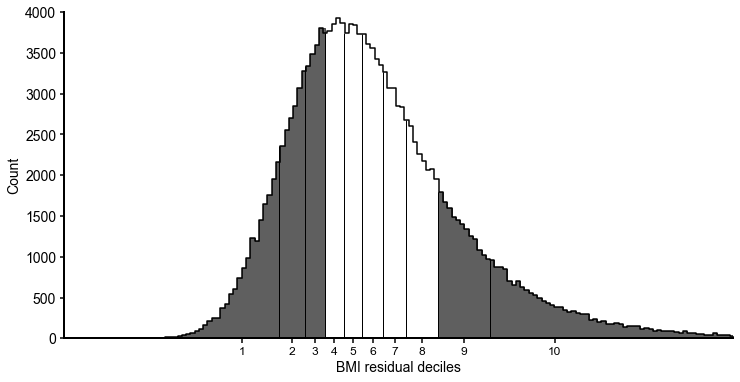

In [12]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
sns_ax = sns.histplot(
    data=bmi_res_df, x="bmi_residuals", 
    stat="count",# hue="Decile_rank", multiple="stack", palette=color_maps, 
    ax=ax, element="step", bins=250, fill=False, color="k",
    )

value_dict = dict(zip(*sns_ax.get_lines()[0].get_data()))


ax.vlines([decile_cut[1][i] for i in range(1, len(decile_cut[1]) -1)] , 0,  [get_hist_y(value_dict, decile_cut[1][i]) for i in range(1, len(decile_cut[1]) - 1)], color="k", linewidth=1., linestyles="solid")
# ax.vlines(decile_cut[1][-2], 0,  get_hist_y(value_dict, decile_cut[1][-2]), color="k")

greater_fillings_xval, greater_fillings_yval = get_fill_vals(value_dict, decile_cut[1][-3], dir="greater")
greater_fillings_xval[0] = decile_cut[1][-3]
ax.fill_between(greater_fillings_xval, greater_fillings_yval, alpha=0.7, color="#1b1b1b", step="post")

lesser_fillings_xval, lesser_fillings_yval = get_fill_vals(value_dict, decile_cut[1][3], dir="lesser")
lesser_fillings_xval[0] = decile_cut[1][3]
ax.fill_between(lesser_fillings_xval, lesser_fillings_yval, alpha=0.7, color="#1b1b1b", step="pre")

ax.set_ylim(0, 4000)
ax.set_xlim(-3.5, 4)
ax.set_xlabel("BMI residual deciles")
xticklocs = [(decile_cut[1][i] + decile_cut[1][i+1])/2 for i in range(len(decile_cut[1])-1)]
xticklocs[0] = -1.5
xticklocs[-1] = 2
xticklabels = ["-".join(list(map(lambda x: str(round(x, 2)), [decile_cut[1][i], decile_cut[1][i+1]]))) for i in range(len(decile_cut[1])-1)]
xticklabels = [f"{i+1}" for i in range(10)]
ax.set_xticks(xticklocs, xticklabels, rotation=0, fontsize=12)
ax.spines[['right', 'top']].set_visible(False)

In [12]:
save_file = "/data5/deepro/ukbiobank/papers/bmi_project/2_prepare_data_for_analysis/white_british/data/cases_controls/bmi_residuals.pdf"
save_pdf(save_file, fig)

<AxesSubplot:xlabel='bmi_residuals', ylabel='Density'>

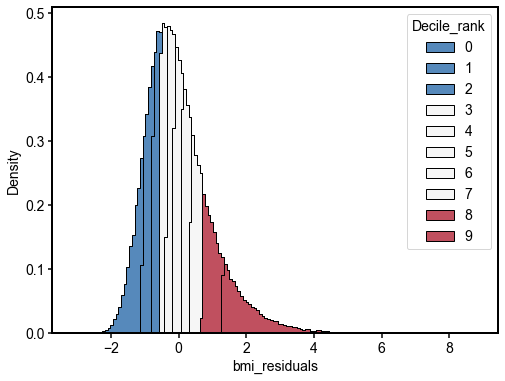

In [55]:
fig, ax = plt.subplots(1,1, figsize=(8, 6))
sns.histplot(
    data=bmi_res_df, x="bmi_residuals", 
    stat="density", hue="Decile_rank", multiple="stack", palette=color_maps, 
    ax=ax, element="step", bins=150,
    )